In [1]:
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np

In [2]:
#  Import and read the flight data for 2018.
import pandas as pd
flight_18_df = pd.read_csv("2018.csv")
flight_18_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Check data types. 
flight_18_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [4]:
# Convert flight date to datetime. 
flight_18_df["FL_DATE"] = pd.to_datetime(flight_18_df["FL_DATE"])

In [5]:
# Separate the datetime column into columns for year, month, day, and weekday. 
flight_18_df["YEAR"]=flight_18_df["FL_DATE"].dt.year
flight_18_df["MONTH"]=flight_18_df["FL_DATE"].dt.month
flight_18_df["DAY"]=flight_18_df["FL_DATE"].dt.day
# flight_18_df["WEEKDAY"]=flight_18_df["FL_DATE"].dt.dayofweek
flight_18_df["WEEKDAY"]=flight_18_df['FL_DATE'].dt.strftime('%A')

In [6]:
# Drop columns that we won't need for our models. 
prio_flight_18_df = flight_18_df.drop(["FL_DATE", "OP_CARRIER_FL_NUM", "CANCELLATION_CODE", "WEATHER_DELAY", "LATE_AIRCRAFT_DELAY", "CARRIER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "Unnamed: 27", "CRS_ARR_TIME", "CANCELLED"],axis=1)
prio_flight_18_df.head()

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,...,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,YEAR,MONTH,DAY,WEEKDAY
0,UA,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,...,-23.0,0.0,268.0,250.0,225.0,1605.0,2018,1,1,Monday
1,UA,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,...,-24.0,0.0,99.0,83.0,65.0,414.0,2018,1,1,Monday
2,UA,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,...,-13.0,0.0,134.0,126.0,106.0,846.0,2018,1,1,Monday
3,UA,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,...,-2.0,0.0,190.0,182.0,157.0,1120.0,2018,1,1,Monday
4,UA,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,...,14.0,0.0,112.0,106.0,83.0,723.0,2018,1,1,Monday


In [7]:
# Fill all null values with zeros. 
prio_flight_18_df = prio_flight_18_df.fillna(0)

In [8]:

# Categorize the scheduled departure time to four key times of day. 
prio_flight_18_df.loc[(prio_flight_18_df["CRS_DEP_TIME"] >= 0) & (prio_flight_18_df["CRS_DEP_TIME"] < 600), "sched_dep_time"] = "Night"
prio_flight_18_df.loc[(prio_flight_18_df["CRS_DEP_TIME"] >= 600) & (prio_flight_18_df["CRS_DEP_TIME"] < 1200), "sched_dep_time"] = "Morning"
prio_flight_18_df.loc[(prio_flight_18_df["CRS_DEP_TIME"] >= 1200) & (prio_flight_18_df["CRS_DEP_TIME"] < 1800), "sched_dep_time"] = "Afternoon"
prio_flight_18_df.loc[(prio_flight_18_df["CRS_DEP_TIME"] >= 1800) & (prio_flight_18_df["CRS_DEP_TIME"] < 2400), "sched_dep_time"] = "Evening"
prio_flight_18_df.head(20)

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,YEAR,MONTH,DAY,WEEKDAY,sched_dep_time
0,UA,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,...,0.0,268.0,250.0,225.0,1605.0,2018,1,1,Monday,Afternoon
1,UA,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,...,0.0,99.0,83.0,65.0,414.0,2018,1,1,Monday,Morning
2,UA,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,...,0.0,134.0,126.0,106.0,846.0,2018,1,1,Monday,Afternoon
3,UA,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,...,0.0,190.0,182.0,157.0,1120.0,2018,1,1,Monday,Afternoon
4,UA,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,...,0.0,112.0,106.0,83.0,723.0,2018,1,1,Monday,Morning
5,UA,ORD,OMA,2241,2244.0,3.0,15.0,2259.0,1.0,2.0,...,0.0,93.0,79.0,62.0,416.0,2018,1,1,Monday,Evening
6,UA,IAH,LAS,750,747.0,-3.0,14.0,801.0,854.0,6.0,...,0.0,206.0,193.0,173.0,1222.0,2018,1,1,Monday,Morning
7,UA,DEN,CID,1324,1318.0,-6.0,11.0,1329.0,1554.0,6.0,...,0.0,115.0,102.0,85.0,692.0,2018,1,1,Monday,Afternoon
8,UA,SMF,EWR,2224,2237.0,13.0,10.0,2247.0,627.0,9.0,...,0.0,314.0,299.0,280.0,2500.0,2018,1,1,Monday,Evening
9,UA,RIC,DEN,1601,1559.0,-2.0,12.0,1611.0,1748.0,8.0,...,0.0,252.0,237.0,217.0,1482.0,2018,1,1,Monday,Afternoon


In [9]:
# Categorize the months column by season. 
prio_flight_18_df.loc[(prio_flight_18_df["MONTH"] == 12) | (prio_flight_18_df["MONTH"] == 1) | (prio_flight_18_df["MONTH"] == 2), "season"] = "Winter"
prio_flight_18_df.loc[(prio_flight_18_df["MONTH"] > 2) & (prio_flight_18_df["MONTH"] <= 5), "season"] = "Spring"
prio_flight_18_df.loc[(prio_flight_18_df["MONTH"] > 5) & (prio_flight_18_df["MONTH"] <= 8), "season"] = "Summer"
prio_flight_18_df.loc[(prio_flight_18_df["MONTH"] > 8) & (prio_flight_18_df["MONTH"] <= 11), "season"] = "Autumn"

In [10]:
prio_flight_18_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 23 columns):
 #   Column               Dtype  
---  ------               -----  
 0   OP_CARRIER           object 
 1   ORIGIN               object 
 2   DEST                 object 
 3   CRS_DEP_TIME         int64  
 4   DEP_TIME             float64
 5   DEP_DELAY            float64
 6   TAXI_OUT             float64
 7   WHEELS_OFF           float64
 8   WHEELS_ON            float64
 9   TAXI_IN              float64
 10  ARR_TIME             float64
 11  ARR_DELAY            float64
 12  DIVERTED             float64
 13  CRS_ELAPSED_TIME     float64
 14  ACTUAL_ELAPSED_TIME  float64
 15  AIR_TIME             float64
 16  DISTANCE             float64
 17  YEAR                 int64  
 18  MONTH                int64  
 19  DAY                  int64  
 20  WEEKDAY              object 
 21  sched_dep_time       object 
 22  season               object 
dtypes: float64(13), int64(4), object

In [11]:
# Categorize each flight as delayed or not, based on if the flight arrived at its destination late. 
#prio_flight_18_df['DELAY'] = np.where((prio_flight_18_df.ARR_DELAY > 0), 1, 0)
prio_flight_18_df.head()

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,YEAR,MONTH,DAY,WEEKDAY,sched_dep_time,season
0,UA,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,...,268.0,250.0,225.0,1605.0,2018,1,1,Monday,Afternoon,Winter
1,UA,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,...,99.0,83.0,65.0,414.0,2018,1,1,Monday,Morning,Winter
2,UA,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,...,134.0,126.0,106.0,846.0,2018,1,1,Monday,Afternoon,Winter
3,UA,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,...,190.0,182.0,157.0,1120.0,2018,1,1,Monday,Afternoon,Winter
4,UA,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,...,112.0,106.0,83.0,723.0,2018,1,1,Monday,Morning,Winter


In [12]:
# Drop remaining delay-related columns and columns that might lead to multi-collinearity:
#prio_flight_18_df = prio_flight_18_df.drop(["ARR_DELAY", "MONTH", "DAY"], axis=1)
prio_flight_18_df = prio_flight_18_df.drop(["DEP_DELAY","MONTH", "DAY"], axis=1)


In [13]:
# Check remaining columns: 
prio_flight_18_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 20 columns):
 #   Column               Dtype  
---  ------               -----  
 0   OP_CARRIER           object 
 1   ORIGIN               object 
 2   DEST                 object 
 3   CRS_DEP_TIME         int64  
 4   DEP_TIME             float64
 5   TAXI_OUT             float64
 6   WHEELS_OFF           float64
 7   WHEELS_ON            float64
 8   TAXI_IN              float64
 9   ARR_TIME             float64
 10  ARR_DELAY            float64
 11  DIVERTED             float64
 12  CRS_ELAPSED_TIME     float64
 13  ACTUAL_ELAPSED_TIME  float64
 14  AIR_TIME             float64
 15  DISTANCE             float64
 16  YEAR                 int64  
 17  WEEKDAY              object 
 18  sched_dep_time       object 
 19  season               object 
dtypes: float64(12), int64(2), object(6)
memory usage: 1.1+ GB


In [14]:
# Determine the top 5 airports so we can narrow the scope of the analysis. 
prio_flight_18_df["ORIGIN"].value_counts()

ATL    390046
ORD    332953
DFW    279298
DEN    235989
CLT    233317
        ...  
AKN        63
CYS        58
IFP        45
ART        25
YNG         2
Name: ORIGIN, Length: 358, dtype: int64

In [15]:
# Determine the top 5 airports so we can narrow the scope of the analysis. 
prio_flight_18_df["DEST"].value_counts()

ATL    390079
ORD    332942
DFW    279272
DEN    236020
CLT    233309
        ...  
AKN        63
CYS        58
IFP        45
ART        26
YNG         2
Name: DEST, Length: 358, dtype: int64

In [16]:
# Determine the top 5 airlines so we can narrow the scope of the analysis. 
prio_flight_18_df["OP_CARRIER"].value_counts()

WN    1352552
DL     949283
AA     916818
OO     774137
UA     621565
YX     316090
B6     305010
MQ     296001
OH     278457
9E     245917
AS     245761
YV     215138
EV     202890
NK     176178
F9     120035
G4      96221
HA      83723
VX      17670
Name: OP_CARRIER, dtype: int64

In [17]:
# Create lists to represent the top 5 airports and airlines. 
top_airports = ["ATL","ORD","DFW","CLT","DEN"]
top_airlines = ["WN", "DL", "AA", "OO", "UA"]

In [18]:
# Limit the data frame to include only the top 5 airports and airlines. 
top_prio_flight_18_df = prio_flight_18_df.loc[prio_flight_18_df['ORIGIN'].isin(top_airports)]
top_prio_flight_18_df = top_prio_flight_18_df.loc[prio_flight_18_df['DEST'].isin(top_airports)]
top_prio_flight_18_df = top_prio_flight_18_df.loc[prio_flight_18_df['OP_CARRIER'].isin(top_airlines)]
top_prio_flight_18_df = top_prio_flight_18_df.reset_index(drop=True)

In [19]:
# Review the columns to determine which need to be scaled and which need one hot encoding. 
top_prio_flight_18_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100170 entries, 0 to 100169
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OP_CARRIER           100170 non-null  object 
 1   ORIGIN               100170 non-null  object 
 2   DEST                 100170 non-null  object 
 3   CRS_DEP_TIME         100170 non-null  int64  
 4   DEP_TIME             100170 non-null  float64
 5   TAXI_OUT             100170 non-null  float64
 6   WHEELS_OFF           100170 non-null  float64
 7   WHEELS_ON            100170 non-null  float64
 8   TAXI_IN              100170 non-null  float64
 9   ARR_TIME             100170 non-null  float64
 10  ARR_DELAY            100170 non-null  float64
 11  DIVERTED             100170 non-null  float64
 12  CRS_ELAPSED_TIME     100170 non-null  float64
 13  ACTUAL_ELAPSED_TIME  100170 non-null  float64
 14  AIR_TIME             100170 non-null  float64
 15  DISTANCE         

In [20]:
# Scale the numeric columns: 
flight_data_scaled = StandardScaler().fit_transform(top_prio_flight_18_df[["CRS_DEP_TIME", "DEP_TIME", "TAXI_OUT", 
                 "WHEELS_OFF", "WHEELS_ON", "TAXI_IN", "ARR_TIME","CRS_ELAPSED_TIME",
                                 "ACTUAL_ELAPSED_TIME", "AIR_TIME", "DISTANCE","ARR_DELAY"]])

In [21]:
# Create a data frame. 
top_prio_flight_scaled = pd.DataFrame(
    flight_data_scaled,
    columns=["CRS_DEP_TIME", "DEP_TIME", "TAXI_OUT", "WHEELS_OFF", "WHEELS_ON", "TAXI_IN",
             "ARR_TIME", "CRS_ELAPSED_TIME", "ACTUAL_ELAPSED_TIME", "AIR_TIME", "DISTANCE","ARR_DELAY"]
)

In [22]:
# Check the data frame. 
top_prio_flight_scaled

,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,ARR_DELAY
0,-0.825414,-0.783328,-0.660801,-0.812330,-0.458193,1.309147,-0.426571,0.191684,0.294236,0.251424,0.454929,-0.285336
1,1.678137,1.648116,-0.254994,1.616385,1.703989,-0.952306,-2.726416,-0.567662,-1.009358,-0.835753,-0.589053,-0.131857
2,0.082282,0.081053,-0.052090,0.139679,0.099851,-0.349252,0.103588,0.647291,0.581027,0.697446,0.454929,-0.307261
3,1.982110,1.885671,-0.052090,1.936371,-2.747116,-0.650779,-2.709615,0.738413,0.294236,0.446559,0.454929,-0.526516
4,-0.825414,-0.787320,-0.559349,-0.814317,-0.951919,0.856857,-0.844725,-0.324671,-0.279345,-0.306103,-0.437333,-0.438814
...,...,...,...,...,...,...,...,...,...,...,...,...
100165,-0.973178,-0.909092,0.049362,-0.844129,-0.787344,-0.500015,-0.773788,0.130936,-0.305417,-0.250350,0.140650,-0.592293
100166,-0.200581,-0.160495,-0.052090,-0.180307,0.094176,-0.047724,0.101721,-0.689157,-0.461848,-0.473361,-0.589053,0.065472
100167,1.581035,1.484423,0.150813,1.540860,1.681288,-0.952306,1.656730,-0.172802,-0.227201,-0.110968,0.628323,-0.548442
100168,1.676026,1.594217,-0.660801,1.554773,1.321871,-0.047724,1.387917,-2.055979,-1.765442,-1.699920,-1.936476,-0.263410


In [23]:
top_prio_flight_scaled.corr()

,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,ARR_DELAY
CRS_DEP_TIME,1.000000,0.924757,0.026803,0.908068,0.678347,-0.015532,0.631291,0.003356,-0.015405,-0.020391,-0.039320,0.102734
DEP_TIME,0.924757,1.000000,0.085943,0.982278,0.750778,0.031235,0.703461,0.006216,0.079551,0.056393,-0.035234,0.137438
TAXI_OUT,0.026803,0.085943,1.000000,0.119283,0.092459,0.039051,0.091351,-0.059240,0.254014,-0.008260,-0.097808,0.275702
WHEELS_OFF,0.908068,0.982278,0.119283,1.000000,0.768175,0.037163,0.720723,0.002791,0.091831,0.059353,-0.039575,0.130091
WHEELS_ON,0.678347,0.750778,0.092459,0.768175,1.000000,0.078361,0.950781,0.048292,0.140061,0.110016,0.038136,0.037446
TAXI_IN,-0.015532,0.031235,0.039051,0.037163,0.078361,1.000000,0.087611,0.024102,0.223795,0.046501,-0.008023,0.144816
ARR_TIME,0.631291,0.703461,0.091351,0.720723,0.950781,0.087611,1.000000,0.044416,0.136194,0.104277,0.032229,0.029062
CRS_ELAPSED_TIME,0.003356,0.006216,-0.059240,0.002791,0.048292,0.024102,0.044416,1.000000,0.829977,0.899965,0.951264,-0.002021
ACTUAL_ELAPSED_TIME,-0.015405,0.079551,0.254014,0.091831,0.140061,0.223795,0.136194,0.829977,1.000000,0.948606,0.799803,0.143148
AIR_TIME,-0.020391,0.056393,-0.008260,0.059353,0.110016,0.046501,0.104277,0.899965,0.948606,1.000000,0.883971,0.050169


In [24]:
# Get dummies for the categorical columns: 
flight_dummies = pd.get_dummies(top_prio_flight_18_df[["OP_CARRIER", "ORIGIN", "DEST", "WEEKDAY", "sched_dep_time", "season"]])

In [25]:
# Check the data frame. 
flight_dummies

,OP_CARRIER_AA,OP_CARRIER_DL,OP_CARRIER_OO,OP_CARRIER_UA,OP_CARRIER_WN,ORIGIN_ATL,ORIGIN_CLT,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_ORD,...,WEEKDAY_Tuesday,WEEKDAY_Wednesday,sched_dep_time_Afternoon,sched_dep_time_Evening,sched_dep_time_Morning,sched_dep_time_Night,season_Autumn,season_Spring,season_Summer,season_Winter
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100165,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
100166,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
100167,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
100168,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [26]:
# Confirm dummies. 
list(flight_dummies.columns)

['OP_CARRIER_AA',
 'OP_CARRIER_DL',
 'OP_CARRIER_OO',
 'OP_CARRIER_UA',
 'OP_CARRIER_WN',
 'ORIGIN_ATL',
 'ORIGIN_CLT',
 'ORIGIN_DEN',
 'ORIGIN_DFW',
 'ORIGIN_ORD',
 'DEST_ATL',
 'DEST_CLT',
 'DEST_DEN',
 'DEST_DFW',
 'DEST_ORD',
 'WEEKDAY_Friday',
 'WEEKDAY_Monday',
 'WEEKDAY_Saturday',
 'WEEKDAY_Sunday',
 'WEEKDAY_Thursday',
 'WEEKDAY_Tuesday',
 'WEEKDAY_Wednesday',
 'sched_dep_time_Afternoon',
 'sched_dep_time_Evening',
 'sched_dep_time_Morning',
 'sched_dep_time_Night',
 'season_Autumn',
 'season_Spring',
 'season_Summer',
 'season_Winter']

In [27]:
# Concatenate the three data frames. 
cleaned_flights_df = pd.concat([top_prio_flight_scaled, flight_dummies], axis=1)

In [28]:
cleaned_flights_df

,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,...,WEEKDAY_Tuesday,WEEKDAY_Wednesday,sched_dep_time_Afternoon,sched_dep_time_Evening,sched_dep_time_Morning,sched_dep_time_Night,season_Autumn,season_Spring,season_Summer,season_Winter
0,-0.825414,-0.783328,-0.660801,-0.812330,-0.458193,1.309147,-0.426571,0.191684,0.294236,0.251424,...,0,0,0,0,1,0,0,0,0,1
1,1.678137,1.648116,-0.254994,1.616385,1.703989,-0.952306,-2.726416,-0.567662,-1.009358,-0.835753,...,0,0,0,1,0,0,0,0,0,1
2,0.082282,0.081053,-0.052090,0.139679,0.099851,-0.349252,0.103588,0.647291,0.581027,0.697446,...,0,0,1,0,0,0,0,0,0,1
3,1.982110,1.885671,-0.052090,1.936371,-2.747116,-0.650779,-2.709615,0.738413,0.294236,0.446559,...,0,0,0,1,0,0,0,0,0,1
4,-0.825414,-0.787320,-0.559349,-0.814317,-0.951919,0.856857,-0.844725,-0.324671,-0.279345,-0.306103,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100165,-0.973178,-0.909092,0.049362,-0.844129,-0.787344,-0.500015,-0.773788,0.130936,-0.305417,-0.250350,...,0,0,0,0,1,0,0,0,0,1
100166,-0.200581,-0.160495,-0.052090,-0.180307,0.094176,-0.047724,0.101721,-0.689157,-0.461848,-0.473361,...,0,0,1,0,0,0,0,0,0,1
100167,1.581035,1.484423,0.150813,1.540860,1.681288,-0.952306,1.656730,-0.172802,-0.227201,-0.110968,...,0,0,0,1,0,0,0,0,0,1
100168,1.676026,1.594217,-0.660801,1.554773,1.321871,-0.047724,1.387917,-2.055979,-1.765442,-1.699920,...,0,0,0,1,0,0,0,0,0,1


In [29]:
# Finally, need to drop the columns that might interfere with delay predictions: 
# Let's check our columns again: 
list(cleaned_flights_df.columns)

['CRS_DEP_TIME',
 'DEP_TIME',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'ARR_TIME',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'ARR_DELAY',
 'OP_CARRIER_AA',
 'OP_CARRIER_DL',
 'OP_CARRIER_OO',
 'OP_CARRIER_UA',
 'OP_CARRIER_WN',
 'ORIGIN_ATL',
 'ORIGIN_CLT',
 'ORIGIN_DEN',
 'ORIGIN_DFW',
 'ORIGIN_ORD',
 'DEST_ATL',
 'DEST_CLT',
 'DEST_DEN',
 'DEST_DFW',
 'DEST_ORD',
 'WEEKDAY_Friday',
 'WEEKDAY_Monday',
 'WEEKDAY_Saturday',
 'WEEKDAY_Sunday',
 'WEEKDAY_Thursday',
 'WEEKDAY_Tuesday',
 'WEEKDAY_Wednesday',
 'sched_dep_time_Afternoon',
 'sched_dep_time_Evening',
 'sched_dep_time_Morning',
 'sched_dep_time_Night',
 'season_Autumn',
 'season_Spring',
 'season_Summer',
 'season_Winter']

In [30]:
cleaned_flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100170 entries, 0 to 100169
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CRS_DEP_TIME              100170 non-null  float64
 1   DEP_TIME                  100170 non-null  float64
 2   TAXI_OUT                  100170 non-null  float64
 3   WHEELS_OFF                100170 non-null  float64
 4   WHEELS_ON                 100170 non-null  float64
 5   TAXI_IN                   100170 non-null  float64
 6   ARR_TIME                  100170 non-null  float64
 7   CRS_ELAPSED_TIME          100170 non-null  float64
 8   ACTUAL_ELAPSED_TIME       100170 non-null  float64
 9   AIR_TIME                  100170 non-null  float64
 10  DISTANCE                  100170 non-null  float64
 11  ARR_DELAY                 100170 non-null  float64
 12  OP_CARRIER_AA             100170 non-null  uint8  
 13  OP_CARRIER_DL             100170 non-null  u

In [31]:
cleaned_flights_df.head(5)

,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,...,WEEKDAY_Tuesday,WEEKDAY_Wednesday,sched_dep_time_Afternoon,sched_dep_time_Evening,sched_dep_time_Morning,sched_dep_time_Night,season_Autumn,season_Spring,season_Summer,season_Winter
0,-0.825414,-0.783328,-0.660801,-0.812330,-0.458193,1.309147,-0.426571,0.191684,0.294236,0.251424,...,0,0,0,0,1,0,0,0,0,1
1,1.678137,1.648116,-0.254994,1.616385,1.703989,-0.952306,-2.726416,-0.567662,-1.009358,-0.835753,...,0,0,0,1,0,0,0,0,0,1
2,0.082282,0.081053,-0.052090,0.139679,0.099851,-0.349252,0.103588,0.647291,0.581027,0.697446,...,0,0,1,0,0,0,0,0,0,1
3,1.982110,1.885671,-0.052090,1.936371,-2.747116,-0.650779,-2.709615,0.738413,0.294236,0.446559,...,0,0,0,1,0,0,0,0,0,1
4,-0.825414,-0.787320,-0.559349,-0.814317,-0.951919,0.856857,-0.844725,-0.324671,-0.279345,-0.306103,...,0,0,0,0,1,0,0,0,0,1


In [32]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics


In [33]:
X=cleaned_flights_df.drop("ARR_DELAY",axis=1)
Y=cleaned_flights_df.ARR_DELAY

In [34]:
Y.head(10)

0   -0.285336
1   -0.131857
2   -0.307261
3   -0.526516
4   -0.438814
5   -0.482665
6   -0.329187
7   -0.592293
8   -0.460740
9    0.087398
Name: ARR_DELAY, dtype: float64

In [35]:
X.columns

Index(['CRS_DEP_TIME', 'DEP_TIME', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'ARR_TIME', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'OP_CARRIER_AA', 'OP_CARRIER_DL',
       'OP_CARRIER_OO', 'OP_CARRIER_UA', 'OP_CARRIER_WN', 'ORIGIN_ATL',
       'ORIGIN_CLT', 'ORIGIN_DEN', 'ORIGIN_DFW', 'ORIGIN_ORD', 'DEST_ATL',
       'DEST_CLT', 'DEST_DEN', 'DEST_DFW', 'DEST_ORD', 'WEEKDAY_Friday',
       'WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'sched_dep_time_Afternoon', 'sched_dep_time_Evening',
       'sched_dep_time_Morning', 'sched_dep_time_Night', 'season_Autumn',
       'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

In [36]:
X.head(10)

,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,...,WEEKDAY_Tuesday,WEEKDAY_Wednesday,sched_dep_time_Afternoon,sched_dep_time_Evening,sched_dep_time_Morning,sched_dep_time_Night,season_Autumn,season_Spring,season_Summer,season_Winter
0,-0.825414,-0.783328,-0.660801,-0.812330,-0.458193,1.309147,-0.426571,0.191684,0.294236,0.251424,...,0,0,0,0,1,0,0,0,0,1
1,1.678137,1.648116,-0.254994,1.616385,1.703989,-0.952306,-2.726416,-0.567662,-1.009358,-0.835753,...,0,0,0,1,0,0,0,0,0,1
2,0.082282,0.081053,-0.052090,0.139679,0.099851,-0.349252,0.103588,0.647291,0.581027,0.697446,...,0,0,1,0,0,0,0,0,0,1
3,1.982110,1.885671,-0.052090,1.936371,-2.747116,-0.650779,-2.709615,0.738413,0.294236,0.446559,...,0,0,0,1,0,0,0,0,0,1
4,-0.825414,-0.787320,-0.559349,-0.814317,-0.951919,0.856857,-0.844725,-0.324671,-0.279345,-0.306103,...,0,0,0,0,1,0,0,0,0,1
5,-1.479799,-1.398176,-0.254994,-1.416527,-1.171353,-0.952306,-1.158340,-0.810652,-0.852926,-0.668495,...,0,0,0,0,1,0,0,0,0,1
6,0.941426,0.895527,-0.457897,0.942625,0.937861,0.404566,1.014565,0.100562,0.059589,0.112042,...,0,0,1,0,0,0,0,0,0,1
7,0.230046,0.216798,-0.762253,0.181416,0.289018,-0.047724,0.293997,0.191684,-0.096842,0.112042,...,0,0,1,0,0,0,0,0,0,1
8,1.678137,1.594217,-0.457897,1.558748,1.609405,-0.650779,1.589527,0.252431,0.007445,0.251424,...,0,0,0,1,0,0,0,0,0,1
9,0.629010,0.634017,-0.457897,0.602764,0.693836,0.253803,0.697217,0.070188,0.085661,0.167795,...,0,0,1,0,0,0,0,0,0,1


In [37]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


In [38]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [39]:
import pickle

In [41]:
#file_name = "../model/Flights18_RFR.sav"
#pickle.dump(reg_rf,open(file_name,'wb'))

In [42]:
y_pred = reg_rf.predict(X_test)

In [43]:
reg_rf.score(X_train,y_train)

0.9768603264896444

In [44]:
reg_rf.score(X_test,y_test)

0.8631418813053076

In [45]:
metrics.r2_score(y_test,y_pred)

0.8631418813053076

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.13142242501472481
MSE: 0.12787071565788996
RMSE: 0.35759015039272257


In [47]:
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred))

MAPE: 4.374934434688243


In [48]:
y_pred

array([-0.16386832, -0.12747197, -0.10203838, ..., -0.36141714,
       -0.52892802, -0.35703204])

In [68]:
actual_vs_pred=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
actual_vs_pred1=actual_vs_pred.head(20)

In [69]:
actual_vs_pred1

,Actual,Predicted
88850,-0.241485,-0.163868
83451,-0.153783,-0.127472
92121,-0.022230,-0.102038
47666,0.021621,-0.080332
95850,0.657461,0.873866
41094,-0.416889,-0.442980
88390,-0.022230,-0.207281
55121,-0.197634,-0.184040
90242,-0.592293,-0.559185
2816,-0.570367,-0.536602


In [70]:
actual_vs_pred.max()

Actual       24.950924
Predicted    18.548237
dtype: float64

In [71]:
actual_vs_pred.shape

(30051, 2)

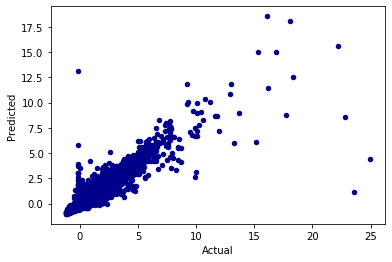

In [72]:
ax1 = actual_vs_pred.plot.scatter(x='Actual', y='Predicted', c='DarkBlue')